In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [12]:
df = pd.read_csv(r"D:\POI data\merged_data\727_3737_add_tenure_garden.csv")


#df = df.drop('tenure', axis=1)



df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])
#df_encoded = pd.get_dummies(df, columns=['property_type', 'borough'])


X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
def testResult(rf_model):
    # 预测训练集和测试集
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    # 计算均方根误差（RMSE）作为性能指标
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    #print(f"Train RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")


    # 计算训练集和测试集的R²值
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    #print(f"Train R²: {train_r2}")
    print(f"Test R²: {test_r2}")

    # 计算训练集和测试集的MAPE值
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    #print(f"Train MAPE: {train_mape:.2f}%")
    print(f"Test MAPE: {test_mape:.2f}%")


In [14]:

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=110, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

testResult(rf_model)

Test RMSE: 2908.0449409643015
Test R²: 0.7154933115240094
Test MAPE: 19.07%


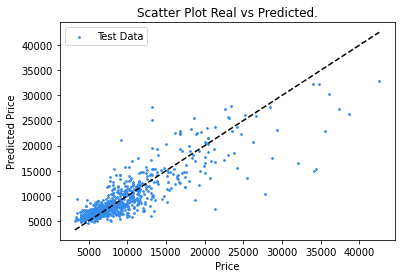

In [15]:

# 获取模型在测试集上的预测值
y_test_pred = rf_model.predict(X_test)

# 绘制测试集的散点图，设置颜色为蓝色，大小为10
plt.scatter(y_test.to_numpy(), y_test_pred, color='#358CEA', s=3, label='Test Data')

# 绘制对角线，表示完美预测的线
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='black', linestyle='--')

# 设置图例和标签
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Scatter Plot Real vs Predicted.')
plt.legend()

# 显示图形
plt.show()


---

In [16]:
df = pd.read_csv(r"D:\POI data\merged_data\727_3737_add_tenure_garden.csv")
df['Public transportAccess15m'] =  df['Public transportAccess15m'] + df['Water transportAccess15m']
df = df.drop(columns=['Water transportAccess15m','AccommodationAccess15m'])

df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [17]:

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=110, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

testResult(rf_model)

Test RMSE: 2919.7592126835207
Test R²: 0.7131965786048662
Test MAPE: 19.11%
